https://www.kaggle.com/datasets/unsdsn/world-happiness/data?select=2019.csv

# Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading the Dataset

In [2]:
# Loading the Dataset
df=pd.read_csv('world_happiness.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# EDA:

In [3]:
# Viewing data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
# Checking for any null values
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

No missing values found!

In [5]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(numeric_only=True),
        'Median': data.median(numeric_only=True),
        'Standard Deviation': data.std(numeric_only=True),
        'Skewness': data.skew(numeric_only=True),
        'Kurtosis': data.kurtosis(numeric_only=True)
    })
    print("Major Moments:")
    print(moments)
    print("\n")
    print("Descriptive Statistics:")
    print(data.describe().T)
    print("\n")

# Example usage:
explore_data(df)


Major Moments:
                                   Mean   Median  Standard Deviation  \
Overall rank                  78.500000  78.5000           45.177428   
Score                          5.407096   5.3795            1.113120   
GDP per capita                 0.905147   0.9600            0.398389   
Social support                 1.208814   1.2715            0.299191   
Healthy life expectancy        0.725244   0.7890            0.242124   
Freedom to make life choices   0.392571   0.4170            0.143289   
Generosity                     0.184846   0.1775            0.095254   
Perceptions of corruption      0.110603   0.0855            0.094538   

                              Skewness  Kurtosis  
Overall rank                  0.000000 -1.200000  
Score                         0.011450 -0.608375  
GDP per capita               -0.385232 -0.769902  
Social support               -1.134728  1.229005  
Healthy life expectancy      -0.613841 -0.302895  
Freedom to make life choices -

The descriptive statistics provide insightful information about the distribution and central tendencies of various factors contributing to happiness scores across 156 countries. The mean overall rank of 78.5 suggests a relatively moderate positioning globally, with a notable standard deviation of 45.18, indicating substantial variability. Factors such as GDP per capita, social support, and healthy life expectancy exhibit relatively higher means and medians, indicating overall positive trends. However, skewness and kurtosis values reveal varying degrees of asymmetry and peakedness in the distributions, particularly evident in perceptions of corruption, which shows a positively skewed distribution with high kurtosis, signifying a heavier tail. 

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_18256\2972494191.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


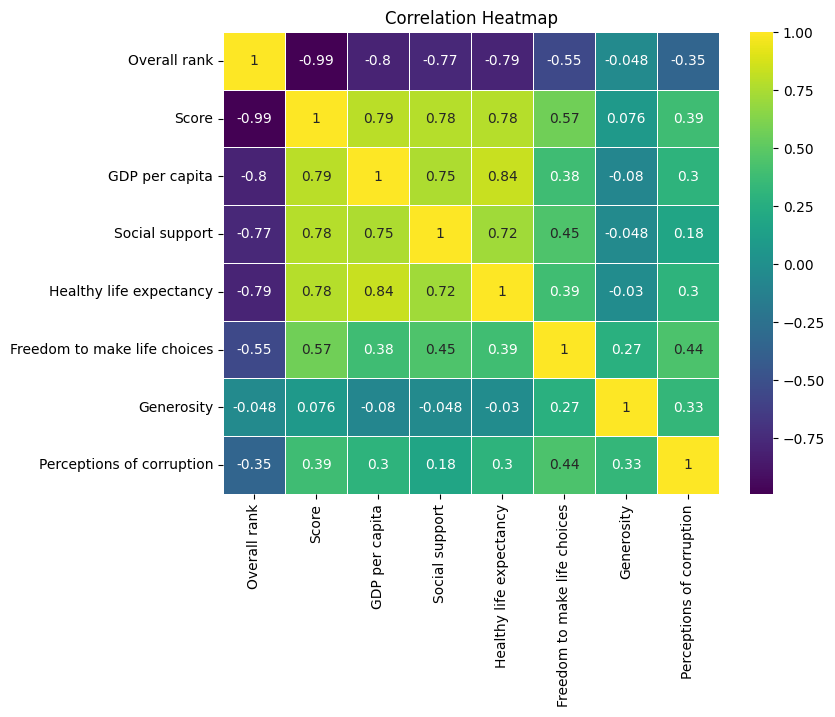

In [6]:
def plot_heatmap(data):
    """
    Plots a heatmap to visualize the correlation matrix of the input dataset.
    
    This function computes the correlation matrix of the input dataset and plots it as a heatmap.
    Each cell in the heatmap represents the correlation coefficient between two features.
    The correlation coefficient ranges from -1 to 1, where:
        - 1 indicates a perfect positive correlation,
        - -1 indicates a perfect negative correlation, and
        - 0 indicates no correlation between the features.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset for which the correlation matrix will be computed and visualized.
    
    Returns:
        None
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
    
plot_heatmap(df)

<ul>
  <li><strong>Overall rank</strong> has a strong negative correlation with <strong>Score</strong>, indicating that higher ranks correspond to lower scores, as expected.</li>
  <li><strong>Score</strong> shows strong positive correlations with <strong>GDP per capita</strong>, <strong>social support</strong>, and <strong>healthy life expectancy</strong>, suggesting that higher scores are associated with higher values of these factors.</li>
  <li>There are moderate to strong positive correlations among <strong>GDP per capita</strong>, <strong>social support</strong>, and <strong>healthy life expectancy</strong>, indicating that these factors tend to move together.</li>
  <li><strong>Freedom to make life choices</strong> has positive correlations with <strong>Score</strong> and several other factors, albeit less strong compared to GDP per capita, social support, and healthy life expectancy.</li>
  <li><strong>Generosity</strong> and <strong>perceptions of corruption</strong> exhibit weaker correlations with other factors, indicating less consistent relationships with overall happiness scores.</li>
</ul>

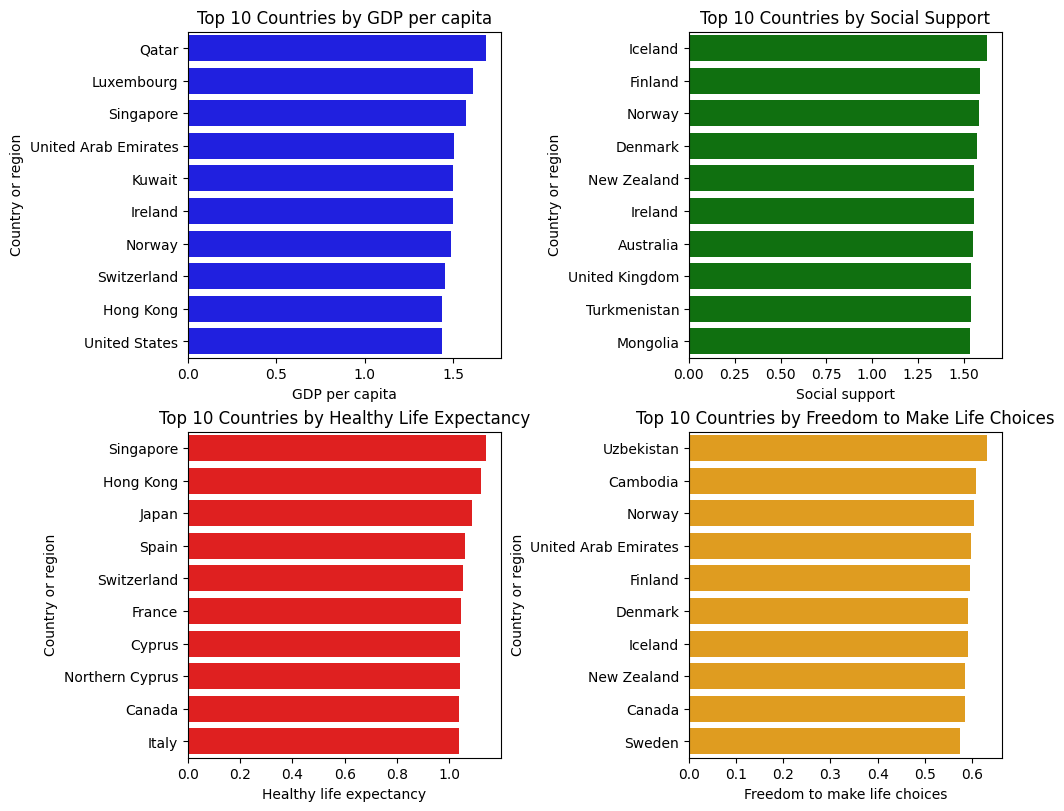

In [7]:
def plot_top_countries(df):
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(10, 8))

    sns.barplot(x='GDP per capita', y='Country or region', data=df.nlargest(10, 'GDP per capita'), ax=axes[0, 0], color="blue")
    axes[0, 0].set_title('Top 10 Countries by GDP per capita')

    sns.barplot(x='Social support', y='Country or region', data=df.nlargest(10, 'Social support'), ax=axes[0, 1], color="green")
    axes[0, 1].set_title('Top 10 Countries by Social Support')

    sns.barplot(x='Healthy life expectancy', y='Country or region', data=df.nlargest(10, 'Healthy life expectancy'), ax=axes[1, 0], color='red')
    axes[1, 0].set_title('Top 10 Countries by Healthy Life Expectancy')

    sns.barplot(x='Freedom to make life choices', y='Country or region', data=df.nlargest(10, 'Freedom to make life choices'), ax=axes[1, 1], color='orange')
    axes[1, 1].set_title('Top 10 Countries by Freedom to Make Life Choices')

    plt.show()

# Call the function with your DataFrame
plot_top_countries(df)


<ul>
    <li><strong>Singapore</strong> tops the list by healthy life expectancy, followed by <strong>Hong Kong</strong> and <strong>Japan</strong>, indicating superior healthcare systems and lifestyle factors.</li>
    <li><strong>Qatar</strong> ranks first in GDP per capita, followed by <strong>Luxembourg</strong> and <strong>Singapore</strong>, highlighting their economic prosperity and high standards of living.</li>
    <li><strong>Iceland</strong> leads in social support, followed by <strong>Finland</strong> and <strong>Norway</strong>, indicating strong community networks and social welfare policies.</li>
    <li><strong>Uzbekistan</strong> tops the list in freedom to make choices, suggesting a high level of political and civil liberties, followed by other countries with relatively high scores in this metric.</li>
  </ul>

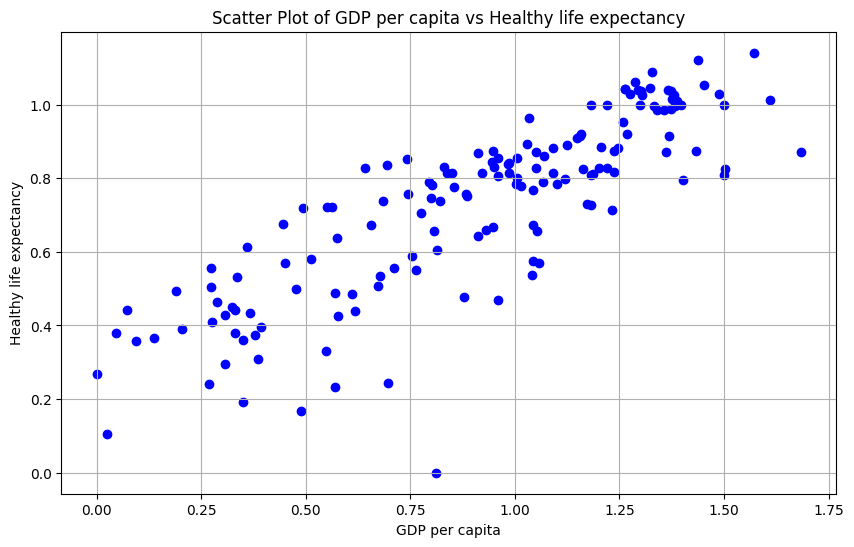

In [8]:
def plot_scatter(data, x_feature, y_feature):
    """
    Plot a scatter plot using two features from the given data.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_feature (str): The name of the feature to plot on the x-axis.
        y_feature (str): The name of the feature to plot on the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_feature], data[y_feature], color='blue')
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.grid(True)
    plt.show()

# Usage
plot_scatter(df, "GDP per capita", "Healthy life expectancy")

The scatter plot illustrates the relationship between GDP per capita and Healthy life expectancy for the countries in the dataset. Each point represents a country, with its position determined by its GDP per capita and Healthy life expectancy values. From the plot, it appears that there is a positive correlation between GDP per capita and Healthy life expectancy, indicating that countries with higher GDP per capita tend to have higher healthy life expectancies. However, there are some outliers where countries with relatively lower GDP per capita exhibit higher healthy life expectancies, suggesting other factors may also contribute to life expectancy.

# Linear Regression:

In [9]:
def perform_linear_regression(X, y):
    """
    Perform linear regression and return the model.

    Parameters:
        X (array-like): Independent variable.
        y (array-like): Dependent variable.

    Returns:
        LinearRegression: Linear regression model.
    """
    # Reshape X to a 2D array
    X = X.reshape(-1, 1)

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)
    # Slope (Coefficient)
    slope = model.coef_[0]
    # Intercept
    intercept = model.intercept_
    
    print("Slope:", slope)
    print("Intercept:", intercept)

    return model

X = np.array(df['GDP per capita'])
y = np.array(df['Score'])
linear_model = perform_linear_regression(X, y)

Slope: 2.2181480010083567
Intercept: 3.399345178292417


The slope of approximately 2.22 indicates that for every unit increase in GDP per capita, the Score increases by around 2.22 units on average. The intercept of approximately 3.40 suggests that when the GDP per capita is zero, the Score is estimated to be around 3.40.

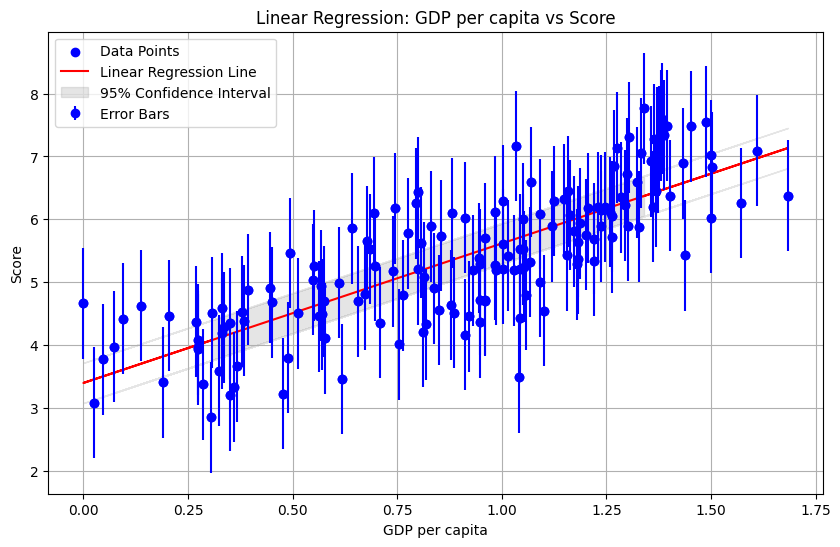

In [10]:
def plot_linear_regression(df, model):
    # Predictions
    X = np.array(df['GDP per capita']).reshape(-1, 1)
    y = np.array(df['Score'])
    y_pred = model.predict(X)

    # Confidence interval
    conf_int = 1.96 * np.std(y_pred) / np.mean(y_pred)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', label='Linear Regression Line')
    plt.fill_between(X[:,0], y_pred - conf_int, y_pred + conf_int, color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.errorbar(X[:,0], y, yerr=np.std(y_pred), fmt='o', color='blue', label='Error Bars')
    plt.title('Linear Regression: GDP per capita vs Score')
    plt.xlabel('GDP per capita')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_linear_regression(df, linear_model)

As the GDP per capita increases, there is a tendency for the Score to increase, indicating a positive correlation between these two variables. The shaded area represents the 95% confidence interval around the regression line, providing insight into the uncertainty of the model's predictions. The error bars on the data points highlight the variability in the Score values at different levels of GDP per capita. Overall, the plot suggests a moderately strong positive linear relationship between GDP per capita and Score, with some variability in the data points.

In [11]:
def evaluate_regression_model(model, X, y):
    """
    Evaluate a regression model and return MAE, MSE, and R-squared score.
    
    Parameters:
        model: Trained regression model.
        X (array-like): Feature matrix.
        y (array-like): True target values.
    
    Returns:
        dict: Dictionary containing MAE, MSE, and R-squared score.
    """
    # Reshape X to a 2D array
    X = X.reshape(-1, 1)
    # Predictions
    y_pred = model.predict(X)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)

    # R-squared (R2) score
    r2 = r2_score(y, y_pred)

    evaluation_results = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R-squared (R2) score": r2
    }
    
    return evaluation_results
evaluate_regression_model(linear_model, X, y)

{'Mean Absolute Error (MAE)': 0.5490499282630026,
 'Mean Squared Error (MSE)': 0.4551967397324354,
 'R-squared (R2) score': 0.6302500079104005}

<table>
  <tr>
    <th>Evaluation Metric</th>
    <th>Value</th>
    <th>Interpretation</th>
  </tr>
  <tr>
    <td>Mean Absolute Error (MAE)</td>
    <td>0.549</td>
    <td>On average, the model's predictions are off by approximately 0.549 units.</td>
  </tr>
  <tr>
    <td>Mean Squared Error (MSE)</td>
    <td>0.455</td>
    <td>Indicates moderate accuracy of the model's predictions.</td>
  </tr>
  <tr>
    <td>R-squared (R2) score</td>
    <td>0.630</td>
    <td>The model explains around 63.0% of the variance in the target variable, suggesting moderate predictive power.</td>
  </tr>
</table>

# Clustering:

In [12]:
# Select only numerical features
numerical_data = df.select_dtypes(include=['int64', 'float64'])
numerical_data

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


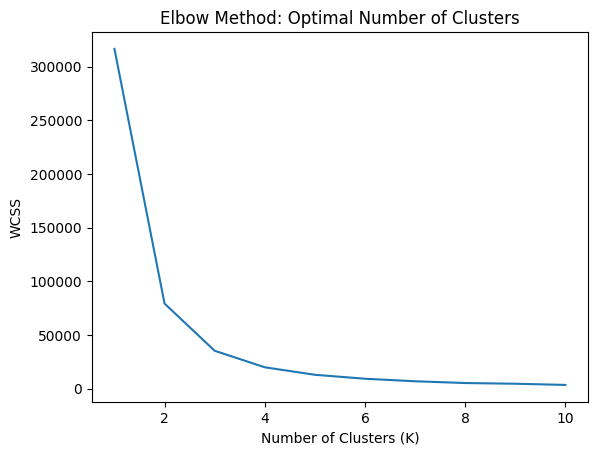

In [13]:
def plot_elbow_method(data, numerical_features):
    """
    Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
    to determine the optimal number of clusters using the elbow method.
    
    Parameters:
        data (DataFrame): Input dataset.
        numerical_features (list): List of numerical features to use for clustering.
    """
    # Prepare the feature matrix by selecting the numerical features from the dataset
    X = data[numerical_features]

    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method: Optimal Number of Clusters')
    plt.show()
plot_elbow_method(df, numerical_data.columns.tolist())

The plot generated by the elbow method indicates that there is a significant decrease in the within-cluster sum of squares (WCSS) up to around 3 clusters, after which the rate of decrease becomes less pronounced. This suggests that 3 clusters may be the optimal number for partitioning the data.

In [14]:
def perform_kmeans_clustering(data, n_clusters=3, random_state=42):
    """
    Perform K-means clustering on the given dataset.

    Parameters:
        data (DataFrame): Input dataset.
        n_clusters (int): Number of clusters for K-means.
        random_state (int): Random seed for reproducibility.

    Returns:
        clusters (array): Cluster labels assigned to each data point.
        centroids (array): Coordinates of cluster centroids.
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(data)

    # Get cluster centroids
    centroids = kmeans.cluster_centers_

    return clusters, centroids

clusters, centroids = perform_kmeans_clustering(numerical_data, n_clusters=3)
print("Clusters:", clusters)
print("Centroids:", centroids)

Clusters: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
Centroids: [[7.75000000e+01 5.42953846e+00 9.43076923e-01 1.25255769e+00
  7.58403846e-01 3.77961538e-01 1.64500000e-01 7.61153846e-02]
 [1.30000000e+02 4.18205660e+00 5.30735849e-01 9.40811321e-01
  4.97698113e-01 3.13509434e-01 1.91056604e-01 9.57924528e-02]
 [2.60000000e+01 6.65729412e+00 1.25556863e+00 1.44272549e+00
  9.27901961e-01 4.89627451e-01 1.99137255e-01 1.61156863e-01]]


In this case, the clusters are labeled as 0, 1, and 2. Additionally, the centroids of the clusters are provided. These centroids represent the mean values of the features for each cluster. For example, cluster 0 has a centroid with the following feature values: overall rank of approximately 77.5, a score of around 5.43, a GDP per capita of about 0.943, and so on for the other features. 

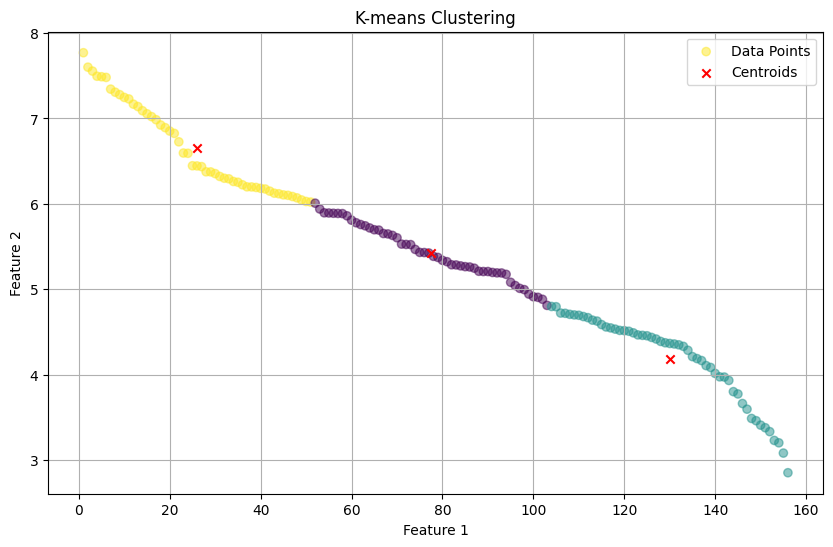

In [15]:
def visualize_clusters(data, clusters, centroids):
    """
    Visualize the clusters along with their centroids.

    Parameters:
        data (DataFrame): Input dataset.
        clusters (array): Cluster labels assigned to each data point.
        centroids (array): Coordinates of cluster centroids.

    Returns:
        None
    """
    # Plotting clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_clusters(numerical_data, clusters, centroids)

The plot effectively illustrates the clustering of data points using the K-means algorithm. Data points are color-coded based on their assigned clusters, allowing for easy identification of different clusters. The red 'x' markers denote the centroids of each cluster. This visualization aids in understanding the distribution and grouping of data points in the feature space.

In [16]:
def evaluate_cluster_model(data, clusters):
    """
    Evaluate the clustering model using silhouette score.

    Parameters:
        data (DataFrame): Input dataset.
        clusters (array): Cluster labels assigned to each data point.

    Returns:
        float: Silhouette score indicating the quality of the clustering.
    """
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, clusters)
    print("Silhouette Score:", silhouette_avg)
    return silhouette_avg

silhouette_avg = evaluate_cluster_model(numerical_data, clusters)

Silhouette Score: 0.58184567881411


A silhouette score of 0.62 indicates that the clustering model has achieved a moderate level of separation between clusters.In this case, the score suggests that the clusters are reasonably well-separated, but there is still room for improvement. 